In [1]:
from utilities import *
from wls import *

<class 'numpy.ndarray'>
Image shape: (530, 800, 3)
Data type: uint8


e:\Utilisateurs\Timothée\Documents\Personnel\N7\2A\epd\src\utilities.py:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image)
e:\Utilisateurs\Timothée\Documents\Personnel\N7\2A\epd\src\utilities.py:19: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


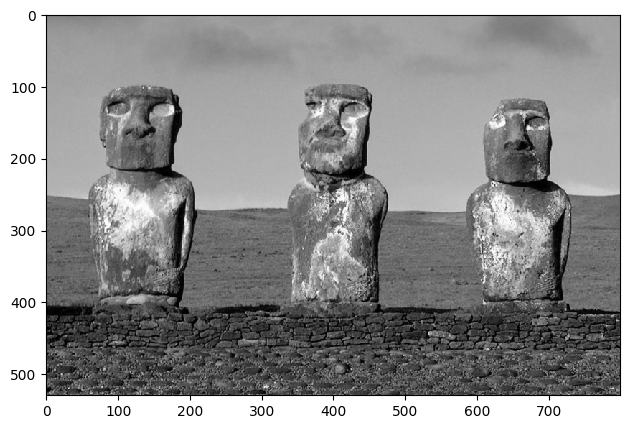

ValueError: cannot reshape array of size 424000 into shape (530,800,3)

In [ ]:
IMAGE_PATH = "../data/image2.png"

image = load_image(IMAGE_PATH, gray=False, verbose=True)
n, m = image.shape[:2]
u = iteration(image, 2, 1.2)
io.imshow(u.reshape(n, m, 1).astype(np.uint8))
io.show()



C:\Users\timot\AppData\Local\Temp\ipykernel_24152\3330798953.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(u.reshape(n, m, 1).astype(np.uint8))
C:\Users\timot\AppData\Local\Temp\ipykernel_24152\3330798953.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


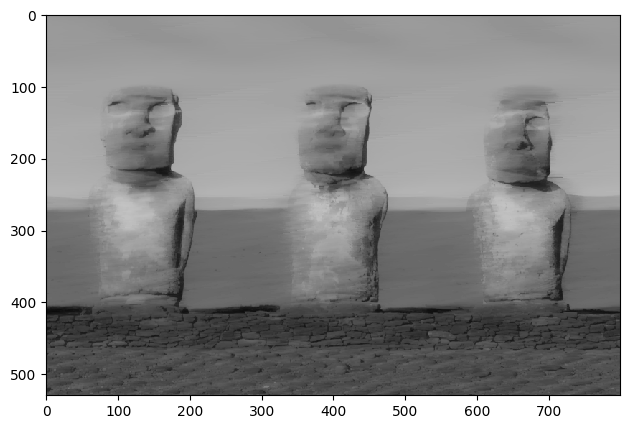

In [3]:
io.imshow(u.reshape(n, m, 1).astype(np.uint8))
io.show()